In [1]:
import numpy as np

In [13]:
import tensorflow as tf

2023-06-04 21:48:07.104709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 21:48:07.968234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
# Take all samples up to 5000 from the end
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]
display(x_train.shape)

x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

(55000, 28, 28)

In [4]:
from matplotlib import pyplot as plt

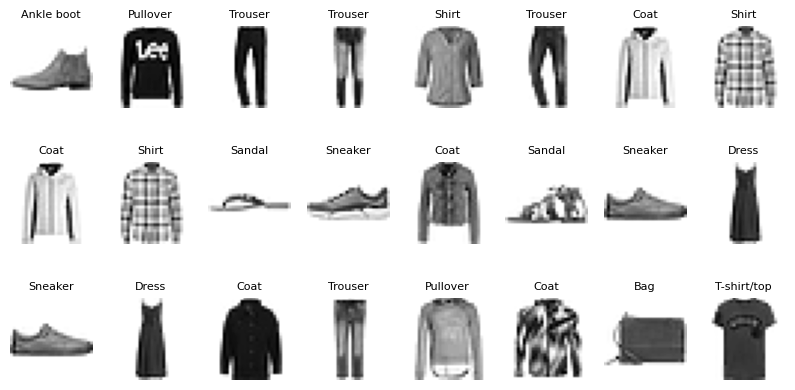

In [5]:
fig, axes = plt.subplots(3, 8, figsize=(10, 5), squeeze=False)
for y in range(3):
    for x in range(8):
        ax: plt.Axes = axes[y][x]
        index = y * 6 + x
        ax.imshow(x_test[index], cmap='binary')
        ax.set_axis_off()
        ax.set_title(class_names[y_test[index]], fontdict=dict(fontsize=8))

# Using the Sequential API

In [6]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)
# List of activation functions can be found here:
# https://keras.io/api/layers/activations/
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

2023-06-04 01:49:38.163021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.260845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.260910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.263940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.264002: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


r/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.899793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.899888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-04 01:49:38.899898: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1722] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2023-06-04 01:49:38.899933: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to r

In [7]:
weights, biases = model.layers[1].get_weights()
print('Biases (init with 0):\n', set(biases))
print('\nWeights (init with random):\n', weights)
print('Biases shape:', biases.shape)
print('Weights shape:', weights.shape)

Biases (init with 0):
 {0.0}

Weights (init with random):
 [[ 5.3297073e-02  2.4198458e-02 -2.1023259e-02 ...  3.5795525e-02
  -7.2061256e-02  4.6089381e-02]
 [ 2.2632368e-02  5.9892908e-03  1.4587238e-02 ...  8.7194145e-03
   4.9419701e-05  2.4750374e-02]
 [-4.4513181e-02  4.6743892e-02  1.0291643e-02 ... -4.6910450e-02
   1.4408320e-02  5.3473756e-02]
 ...
 [-6.0724389e-02 -2.6091568e-02 -2.8863657e-02 ...  4.1813411e-02
   3.5757974e-02  7.3892877e-02]
 [-4.4557646e-02 -5.9672445e-02  6.5973431e-02 ... -5.0661370e-02
  -2.6788648e-02  5.1353276e-02]
 [-1.4996272e-02  1.0063291e-02 -3.2075007e-02 ...  5.3060532e-02
   6.6655308e-02 -6.4764827e-02]]
Biases shape: (300,)
Weights shape: (784, 300)


In [8]:
# For full options:
# loss:         https://keras.io/api/losses/
# optimizer:    https://keras.io/api/optimizers
# metrics:      https://keras.io/api/metrics
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


2023-06-04 01:49:59.493115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-04 01:49:59.499916: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f3191261810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-04 01:49:59.499943: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-06-04 01:49:59.674264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-04 01:49:59.735043: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-04 01:49:59.772633: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 9s 4ms/step - loss: 0.7243 - accuracy: 0.7616 - val_loss: 0.5028 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4890 - accuracy: 0.8304 - val_loss: 0.4496 - val_accuracy: 0.8374
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4420 - accuracy: 0.8444 - val_loss: 0.4224 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4163 - accuracy: 0.8536 - val_loss: 0.3932 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3953 - accuracy: 0.8612 - val_loss: 0.3900 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3788 - accuracy: 0.8665 - val_loss: 0.3902 - val_accuracy: 0.8624
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8700 - val_loss: 0.3657 - val_accuracy: 0.8682
Epo

In [28]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

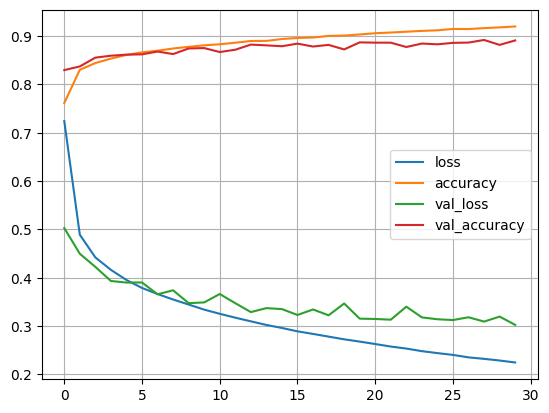

In [10]:
import pandas as pd
df = pd.DataFrame(history.history)
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.grid()
display()

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8848


[0.3233973979949951, 0.8848000168800354]

In [12]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 15ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [13]:
np.array(class_names)[np.argmax(y_proba, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Simulating bad initialization

In [18]:
# Remove flattened layer
bad_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
bad_model_1.build(input_shape=(28, 28))
bad_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (28, 784)                 22736     
                                                                 
 dense_8 (Dense)             (28, 300)                 235500    
                                                                 
 dense_9 (Dense)             (28, 100)                 30100     
                                                                 
 dense_10 (Dense)            (28, 10)                  1010      
                                                                 
Total params: 289,346
Trainable params: 289,346
Non-trainable params: 0
_________________________________________________________________


In [23]:
bad_model_1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.sparse_categorical_accuracy
)
try:
    bad_hist_1 = bad_model_1.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))
except Exception as e:
    print(f'{type(e)}')

Epoch 1/30
<class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>


2023-06-04 00:15:58.255809: W tensorflow/core/framework/op_kernel.cc:1818] INVALID_ARGUMENT: required broadcastable shapes
2023-06-04 00:15:58.255860: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: required broadcastable shapes
	 [[{{node Equal}}]]


In [25]:
# Compile with categorical_crossentropy loss function instead of sparse_categorical_crossentropy
bad_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
bad_model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.categorical_accuracy]
)
bad_hist_2 = bad_model_2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


ValueError: in user code:

    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [26]:
# Wrong input format
bad_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(29, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
bad_model_3.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)
bad_hist_3 = bad_model_3.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


ValueError: in user code:

    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/amitaharoni/miniconda3/envs/tf/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 29, 28), found shape=(None, 28, 28)


## Regression with MLP (multi-layer perceptron)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('../ch02/data/housing/housing.csv')
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [27]:
x = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = data['median_house_value']
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, y_train = x_train_full[:-2000], y_train_full[:-2000]
x_valid, y_valid = x_train_full[-2000:], y_train_full[-2000:]
(x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape)

((14346, 8), (2000, 8), (4087, 8), (14346,), (2000,), (4087,))

In [29]:
tf.keras.backend.clear_session()
num_features = x_train.shape[1:]   # tuple with one element (8,)
tf.keras.utils.set_random_seed(42)
# This layer the same thing as sci-kit learn's StandardScaler.
# Must call `adapt` on this layer with the training data before calling `fit`
norm_layer = tf.keras.layers.Normalization(input_shape=num_features)
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=['RootMeanSquaredError']
)
norm_layer.adapt(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,618
Trainable params: 5,601
Non-trainable params: 17
_____________________________________________________

In [30]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
449/449 [==============================] - 3s 4ms/step - loss: 49367248896.0000 - root_mean_squared_error: 222187.4219 - val_loss: 26171883520.0000 - val_root_mean_squared_error: 161777.2656
Epoch 2/20
449/449 [==============================] - 2s 3ms/step - loss: 14203339776.0000 - root_mean_squared_error: 119177.7656 - val_loss: 9947626496.0000 - val_root_mean_squared_error: 99737.7891
Epoch 3/20
449/449 [==============================] - 2s 3ms/step - loss: 9030041600.0000 - root_mean_squared_error: 95026.5312 - val_loss: 7576798208.0000 - val_root_mean_squared_error: 87044.8047
Epoch 4/20
449/449 [==============================] - 2s 4ms/step - loss: 7147944960.0000 - root_mean_squared_error: 84545.5156 - val_loss: 6307164672.0000 - val_root_mean_squared_error: 79417.6562
Epoch 5/20
449/449 [==============================] - 2s 4ms/step - loss: 6060747264.0000 - root_mean_squared_error: 77850.7969 - val_loss: 5543845888.0000 - val_root_mean_squared_error: 74457.0078
Epoc

# Using the Functional API

## Wide & Deep network

In [32]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization_2 (Normalization  (None, 8)           17          ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 dense_7 (Dense)                (None, 30)           270         ['normalization_2[0][0]']        
                                                                                                  
 dense_8 (Dense)                (None, 30)           930         ['dense_7[0][0]']            

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
normalization_layer.adapt(x_train)

In [34]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
449/449 [==============================] - 2s 4ms/step - loss: 56027643904.0000 - root_mean_squared_error: 236701.5938 - val_loss: 54706024448.0000 - val_root_mean_squared_error: 233893.1875
Epoch 2/20
449/449 [==============================] - 1s 3ms/step - loss: 55106596864.0000 - root_mean_squared_error: 234747.9375 - val_loss: 52917788672.0000 - val_root_mean_squared_error: 230038.6719
Epoch 3/20
449/449 [==============================] - 1s 3ms/step - loss: 52101959680.0000 - root_mean_squared_error: 228258.5312 - val_loss: 48800952320.0000 - val_root_mean_squared_error: 220909.3750
Epoch 4/20
449/449 [==============================] - 1s 3ms/step - loss: 46712647680.0000 - root_mean_squared_error: 216131.0938 - val_loss: 42506084352.0000 - val_root_mean_squared_error: 206170.0312
Epoch 5/20
449/449 [==============================] - 1s 3ms/step - loss: 39559811072.0000 - root_mean_squared_error: 198896.4844 - val_loss: 34999132160.0000 - val_root_mean_squared_error: 18

## Wide & Deep 2: Different features go through different pathways

In [63]:
input_wide = tf.keras.layers.Input(shape=[5], name='input_wide')  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name='input_deep')  # features 2 to 7
# Note that for the normalization layers we must have a variable that holds their definition so that we can call adapt
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
# Note the nuance: we use concatenate(args) as a shortcut instead of Concatenate()(args)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 normalization_6 (Normalization  (None, 6)           13          ['input_deep[0][0]']             
 )                                                                                                
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 30)           210         ['normalization_6[0][0]']  

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [66]:
x_train_wide, x_train_deep = x_train.iloc[:, :5], x_train.iloc[:, 2:]
x_valid_wide, x_valid_deep = x_valid.iloc[:, :5], x_valid.iloc[:, 2:]
x_test_wide, x_test_deep = x_test.iloc[:, :5], x_test.iloc[:, 2:]

norm_layer_wide.adapt(x_train_wide)
norm_layer_deep.adapt(x_train_deep)
history = model.fit(
    dict(input_wide=x_train_wide, input_deep=x_train_deep), y_train,
    epochs=20,
    validation_data=(dict(input_wide=x_valid_wide, input_deep=x_valid_deep), y_valid)
)

Epoch 1/20
449/449 [==============================] - 3s 4ms/step - loss: 56008007680.0000 - root_mean_squared_error: 236660.1094 - val_loss: 54638039040.0000 - val_root_mean_squared_error: 233747.8125
Epoch 2/20
449/449 [==============================] - 2s 4ms/step - loss: 54885076992.0000 - root_mean_squared_error: 234275.6406 - val_loss: 52514545664.0000 - val_root_mean_squared_error: 229160.5156
Epoch 3/20
449/449 [==============================] - 2s 5ms/step - loss: 51367096320.0000 - root_mean_squared_error: 226643.1094 - val_loss: 47798087680.0000 - val_root_mean_squared_error: 218627.7344
Epoch 4/20
449/449 [==============================] - 2s 5ms/step - loss: 45311905792.0000 - root_mean_squared_error: 212865.9375 - val_loss: 40923856896.0000 - val_root_mean_squared_error: 202296.4531
Epoch 5/20
449/449 [==============================] - 2s 4ms/step - loss: 37764968448.0000 - root_mean_squared_error: 194332.1094 - val_loss: 33264828416.0000 - val_root_mean_squared_error: 18

In [67]:
model.evaluate((x_test_wide, x_test_deep), y_test)

128/128 [==============================] - 0s 3ms/step - loss: 7413059584.0000 - root_mean_squared_error: 86099.1250


[7413059584.0, 86099.125]

In [68]:
y_pred = model.predict((x_test_wide[:3], x_test_deep[:3]))
pd.concat([pd.DataFrame(y_pred), y_test[:3].reset_index(drop=True)], axis=1)

1/1 [==============================] - 0s 47ms/step


,0,median_house_value
0,136657.3125,80100.0
1,435668.3750,500001.0
2,241099.2500,352100.0


## Wide & Deep 3: with auxiliary output for regularization

In [69]:
input_wide = tf.keras.layers.Input(shape=[5], name='input_wide')  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name='input_deep')  # features 2 to 7
# Note that for the normalization layers we must have a variable that holds their definition so that we can call adapt
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
# Note the nuance: we use concatenate(args) as a shortcut instead of Concatenate()(args)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1, name='output')(concat)
aux_output = tf.keras.layers.Dense(1, name='aux_output')(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 normalization_8 (Normalization  (None, 6)           13          ['input_deep[0][0]']             
 )                                                                                                
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 30)           210         ['normalization_8[0][0]']  

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=dict(output=tf.keras.losses.mean_squared_error, aux_output=tf.keras.losses.mean_squared_error),
    loss_weights=dict(output=0.9, aux_output=0.1),
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
norm_layer_wide.adapt(x_train_wide)
norm_layer_deep.adapt(x_train_deep)

# We want each output (output and aux_output) to predict the same thing, so we are passing y_train to both
hist = model.fit(
    dict(input_wide=x_train_wide, input_deep=x_train_deep),
    dict(output=y_train, aux_output=y_train),
    epochs=20,
    validation_data=(
        dict(input_wide=x_valid_wide, input_deep=x_valid_deep),
        dict(output=y_valid, aux_output=y_valid)
    )
)

Epoch 1/20
449/449 [==============================] - 4s 7ms/step - loss: 56033042432.0000 - output_loss: 56031678464.0000 - aux_output_loss: 56045428736.0000 - output_root_mean_squared_error: 236710.1094 - aux_output_root_mean_squared_error: 236739.1562 - val_loss: 54733938688.0000 - val_output_loss: 54729613312.0000 - val_aux_output_loss: 54772965376.0000 - val_output_root_mean_squared_error: 233943.6094 - val_aux_output_root_mean_squared_error: 234036.2500
Epoch 2/20
449/449 [==============================] - 3s 7ms/step - loss: 55220461568.0000 - output_loss: 55210250240.0000 - aux_output_loss: 55312265216.0000 - output_root_mean_squared_error: 234968.6094 - aux_output_root_mean_squared_error: 235185.5938 - val_loss: 53154226176.0000 - val_output_loss: 53137739776.0000 - val_aux_output_loss: 53302571008.0000 - val_output_root_mean_squared_error: 230516.2500 - val_aux_output_root_mean_squared_error: 230873.4844
Epoch 3/20
449/449 [==============================] - 3s 7ms/step - loss

In [79]:
eval_results = model.evaluate(
    dict(input_wide=x_test_wide, input_deep=x_test_deep),
    dict(output=y_test, aux_output=y_test),
    return_dict=True
)
# The 'loss' key is the weighted sum of the losses
display(eval_results)
eval_results['output_loss'] * 0.9 + eval_results['aux_output_loss'] * 0.1 - eval_results['loss']

128/128 [==============================] - 1s 5ms/step - loss: 8115868160.0000 - output_loss: 8115778560.0000 - aux_output_loss: 8116692480.0000 - output_root_mean_squared_error: 90087.6172 - aux_output_root_mean_squared_error: 90092.6875


{'loss': 8115868160.0,
 'output_loss': 8115778560.0,
 'aux_output_loss': 8116692480.0,
 'output_root_mean_squared_error': 90087.6171875,
 'aux_output_root_mean_squared_error': 90092.6875}

1792.0

In [82]:
display(model.output_names)
y_pred_tuple = model.predict(dict(input_wide=x_test_wide[:3], input_deep=x_test_deep[:3]))
dict(zip(model.output_names, y_pred_tuple))

['output', 'aux_output']

1/1 [==============================] - 0s 17ms/step


{'output': array([[136499.62],
        [437368.62],
        [241951.31]], dtype=float32),
 'aux_output': array([[136450.8 ],
        [437226.94],
        [241876.06]], dtype=float32)}

# Using the Subclassing API

In [83]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [88]:
model = WideAndDeepModel(30, activation='relu', name='subclassing-example-model')
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=('mse', 'mse'),
    optimizer=optimizer,
    metrics=['RootMeanSquaredError']
)
model.norm_layer_wide.adapt(x_train_wide)
model.norm_layer_deep.adapt(x_train_deep)

In [89]:
history = model.fit(
    (x_train_wide, x_train_deep),
    (y_train, y_train),
    epochs=20,
    validation_data=(
        (x_valid_wide, x_valid_deep),
        (y_valid, y_valid)
    )
)

Epoch 1/20
449/449 [==============================] - 4s 7ms/step - loss: 112056639488.0000 - output_1_loss: 56023592960.0000 - output_2_loss: 56033026048.0000 - output_1_root_mean_squared_error: 236693.0312 - output_2_root_mean_squared_error: 236712.9531 - val_loss: 109419954176.0000 - val_output_1_loss: 54697123840.0000 - val_output_2_loss: 54722793472.0000 - val_output_1_root_mean_squared_error: 233874.1562 - val_output_2_root_mean_squared_error: 233929.0312
Epoch 2/20
449/449 [==============================] - 3s 7ms/step - loss: 110207016960.0000 - output_1_loss: 55073951744.0000 - output_2_loss: 55133028352.0000 - output_1_root_mean_squared_error: 234678.3906 - output_2_root_mean_squared_error: 234804.2344 - val_loss: 105890463744.0000 - val_output_1_loss: 52898521088.0000 - val_output_2_loss: 52991934464.0000 - val_output_1_root_mean_squared_error: 229996.7812 - val_output_2_root_mean_squared_error: 230199.7656
Epoch 3/20
449/449 [==============================] - 3s 7ms/step - 

# Saving models

In [91]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization_17 (Normalizatio  (None, 8)           17          ['input_5[0][0]']                
 n)                                                                                               
                                                                                                  
 dense_34 (Dense)               (None, 30)           270         ['normalization_17[0][0]']       
                                                                                                  
 dense_35 (Dense)               (None, 30)           930         ['dense_34[0][0]']         

In [93]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
normalization_layer.adapt(x_train)
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
449/449 [==============================] - 2s 4ms/step - loss: 56020004864.0000 - root_mean_squared_error: 236685.4531 - val_loss: 54678384640.0000 - val_root_mean_squared_error: 233834.0938
Epoch 2/20
449/449 [==============================] - 2s 4ms/step - loss: 55040172032.0000 - root_mean_squared_error: 234606.4219 - val_loss: 52782276608.0000 - val_root_mean_squared_error: 229743.9375
Epoch 3/20
449/449 [==============================] - 2s 4ms/step - loss: 51899654144.0000 - root_mean_squared_error: 227814.9531 - val_loss: 48444375040.0000 - val_root_mean_squared_error: 220100.8281
Epoch 4/20
449/449 [==============================] - 2s 3ms/step - loss: 46263549952.0000 - root_mean_squared_error: 215089.6250 - val_loss: 41796169728.0000 - val_root_mean_squared_error: 204441.1094
Epoch 5/20
449/449 [==============================] - 2s 3ms/step - loss: 38737186816.0000 - root_mean_squared_error: 196817.6406 - val_loss: 33856563200.0000 - val_root_mean_squared_error: 18

In [94]:
model.save('test_keras_save', save_format='tf')

INFO:tensorflow:Assets written to: test_keras_save/assets


INFO:tensorflow:Assets written to: test_keras_save/assets


In [95]:
loaded_model = tf.keras.models.load_model('test_keras_save')
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization_17 (Normalizatio  (None, 8)           17          ['input_5[0][0]']                
 n)                                                                                               
                                                                                                  
 dense_34 (Dense)               (None, 30)           270         ['normalization_17[0][0]']       
                                                                                                  
 dense_35 (Dense)               (None, 30)           930         ['dense_34[0][0]']         

## Callbacks
These can be found here: [https://keras.io/api/callbacks/](https://keras.io/api/callbacks/)

In [97]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'my_checkpoints',
    save_weights_only=True,
    save_best_only=True
)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
449/449 [==============================] - 2s 4ms/step - loss: 4842546688.0000 - root_mean_squared_error: 69588.4062 - val_loss: 4654696960.0000 - val_root_mean_squared_error: 68225.3359
Epoch 2/100
449/449 [==============================] - 2s 4ms/step - loss: 4813490176.0000 - root_mean_squared_error: 69379.3203 - val_loss: 4628836352.0000 - val_root_mean_squared_error: 68035.5547
Epoch 3/100
449/449 [==============================] - 2s 4ms/step - loss: 4787110912.0000 - root_mean_squared_error: 69188.9531 - val_loss: 4604933120.0000 - val_root_mean_squared_error: 67859.6562
Epoch 4/100
449/449 [==============================] - 2s 4ms/step - loss: 4762941440.0000 - root_mean_squared_error: 69014.0703 - val_loss: 4581445120.0000 - val_root_mean_squared_error: 67686.3672
Epoch 5/100
449/449 [==============================] - 2s 3ms/step - loss: 4742155776.0000 - root_mean_squared_error: 68863.3125 - val_loss: 4560013312.0000 - val_root_mean_squared_error: 67527.8750
Epoch

In [102]:
model.evaluate(x_test, y_test)

128/128 [==============================] - 0s 3ms/step - loss: 4387451904.0000 - root_mean_squared_error: 66237.8438


[4387451904.0, 66237.84375]

In [103]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        ratio = logs['val_loss'] / logs['loss']
        print(f'Epoch={epoch}, val/train={ratio:.2f}')

model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
normalization_layer.adapt(x_train)
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), callbacks=[PrintValTrainRatioCallback()])

Epoch 1/20
449/449 [==============================] - 2s 4ms/step - loss: 4349832192.0000 - root_mean_squared_error: 65953.2578 - val_loss: 4189281280.0000 - val_root_mean_squared_error: 64724.6562
Epoch 2/20
449/449 [==============================] - 2s 4ms/step - loss: 4349027328.0000 - root_mean_squared_error: 65947.1562 - val_loss: 4190930432.0000 - val_root_mean_squared_error: 64737.3945
Epoch 3/20
449/449 [==============================] - 2s 4ms/step - loss: 4347632128.0000 - root_mean_squared_error: 65936.5781 - val_loss: 4190903296.0000 - val_root_mean_squared_error: 64737.1875
Epoch 4/20
449/449 [==============================] - 2s 3ms/step - loss: 4345739776.0000 - root_mean_squared_error: 65922.2266 - val_loss: 4189454336.0000 - val_root_mean_squared_error: 64725.9922
Epoch 5/20
449/449 [==============================] - 2s 4ms/step - loss: 4344627712.0000 - root_mean_squared_error: 65913.7891 - val_loss: 4187714816.0000 - val_root_mean_squared_error: 64712.5547
Epoch 6/20

# TensorBoard

In [104]:
from pathlib import Path
import time

def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir) / time.strftime('run_%Y_%m_%d_%H_%M_%S')

In [109]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Launching TensorBoard...

In [112]:
run_logdir = get_run_logdir()
print(run_logdir)
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    run_logdir,
    # profile_batch=(100, 200)
)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
normalization_layer.adapt(x_train)
model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

my_logs/run_2023_06_05_00_27_54
Epoch 1/30
449/449 [==============================] - 3s 5ms/step - loss: 4177788672.0000 - root_mean_squared_error: 64635.8164 - val_loss: 4046007552.0000 - val_root_mean_squared_error: 63608.2344
Epoch 2/30
449/449 [==============================] - 2s 5ms/step - loss: 4177806592.0000 - root_mean_squared_error: 64635.9531 - val_loss: 4052286208.0000 - val_root_mean_squared_error: 63657.5703
Epoch 3/30
449/449 [==============================] - 2s 4ms/step - loss: 4177500672.0000 - root_mean_squared_error: 64633.5859 - val_loss: 4052389120.0000 - val_root_mean_squared_error: 63658.3789
Epoch 4/30
449/449 [==============================] - 2s 4ms/step - loss: 4175197184.0000 - root_mean_squared_error: 64615.7656 - val_loss: 4052443136.0000 - val_root_mean_squared_error: 63658.8008
Epoch 5/30
449/449 [==============================] - 2s 5ms/step - loss: 4174408448.0000 - root_mean_squared_error: 64609.6602 - val_loss: 4051763968.0000 - val_root_mean_squa

In [117]:
import numpy as np
def add_fake_data_to_tensorboard(log_dir):
    writer = tf.summary.create_file_writer(str(log_dir))
    with writer.as_default():
        for step in range(1, 1000 + 1):
            tf.summary.scalar('my_scalar', np.sin(step / 10), step=step)

            data = (np.random.randn(100) + 2) * step / 100 # gets larger
            tf.summary.histogram('my_hist', data, buckets=50, step=step)

            images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
            tf.summary.image('my_images', images, step=step)

            texts = [f'The step is {step}', f'Its square is {step ** 2}']
            tf.summary.text('my_text', texts, step=step)

            sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
            audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
            tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

In [118]:
test_logdir = get_run_logdir()
add_fake_data_to_tensorboard(test_logdir)

# Fine tuning ANN hyperparameters

In [119]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
# Take all samples up to 5000 from the end
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]

x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [121]:
import keras_tuner as kt

def build_model(hp: kt.HyperParameters) -> tf.keras.Model:
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss=tf.keras.losses.sparse_categorical_crossentropy,
        optimizer=optimizer,
        metrics=[tf.keras.metrics.sparse_categorical_accuracy]
    )
    return model

In [123]:
# This calls build_model() once with empty Hyperparameters object to gather all the specifications and default. Then it samples the hyperparameters randomly per trial from the specified ranges.
# The objective is used to prefer the best trial.
random_search_tuner = kt.RandomSearch(
    build_model,
    objective='val_sparse_categorical_accuracy',
    max_trials=5,
    overwrite=True,                            # delete project folder each time. Turn off to continue where you left off, e.g. with max_trials=10.
    directory='fine_tuning_fashion_mnist_ex',  # top folder
    project_name='fine_tuning',                # sub folder
    seed=42
)
random_search_tuner.search(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Trial 5 Complete [00h 01m 23s]
val_sparse_categorical_accuracy: 0.7803999781608582

Best val_sparse_categorical_accuracy So Far: 0.8619999885559082
Total elapsed time: 00h 07m 42s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [152]:
tf.get_logger().setLevel('ERROR')

top_3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top_3_models[0]

top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [127]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8619999885559082


In [137]:
best_trial.metrics.get_last_value('val_sparse_categorical_accuracy')

0.8619999885559082

In [153]:
best_model.reset_metrics()
best_model.reset_states()

In [154]:
best_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 0.3672 - sparse_categorical_accuracy: 0.8663
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3575 - sparse_categorical_accuracy: 0.8702
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3475 - sparse_categorical_accuracy: 0.8732
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3426 - sparse_categorical_accuracy: 0.8749
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3344 - sparse_categorical_accuracy: 0.8781
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3274 - sparse_categorical_accuracy: 0.8818
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3216 - sparse_categorical_accuracy: 0.8829
Epoch 8/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3155 - sparse_categorical_accuracy: 0.8849
Epoch 9/10
1719/1719 [=========

## Fine tuning model.fit() and data preprocessing hyperparameters

In [158]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp: kt.HyperParameters):
        return build_model(hp)

    def fit(
            self,
            hp: kt.HyperParameters,
            model: tf.keras.Model,
            # the model.fit() arguments
            x,
            y,
            **kwargs
    ) -> tf.keras.callbacks.History:
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            x = norm_layer(x)
        return model.fit(x, y, **kwargs)

In [164]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),
    objective='val_sparse_categorical_accuracy',
    seed=42,
    max_epochs=10,
    # Every cycle, the model picks the 1/factor most successful models, until only one remains
    # This is repeated twice (hyperband_iterations)
    # Total number of epochs is max_epochs * (log(max_epochs) / log(factor)) ** 2
    factor=3,
    hyperband_iterations=2,
    overwrite=True,
    directory='fine_tuning_fashion_mnist_ex',
    project_name='hyperband'
)
root_logdir = Path(hyperband_tuner.project_dir) / 'tensorboard'
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
print(f'run in command line:\ntensorboard --logdir=ch10/{root_logdir}')

run in command line:
tensorboard --logdir=ch10/fine_tuning_fashion_mnist_ex/hyperband/tensorboard


In [167]:
hyperband_tuner.search(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb]
)